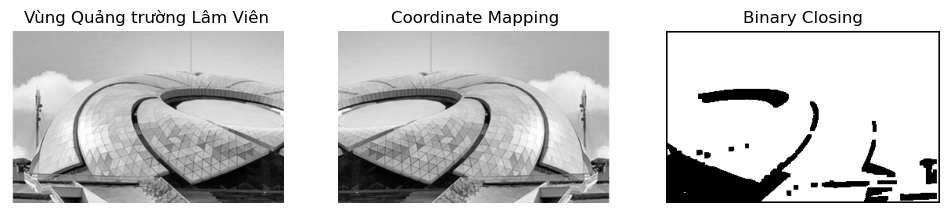

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import binary_closing

# Đọc ảnh Đà Lạt từ thư mục exercise
img = cv2.imread('dalat.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Cắt vùng Quảng trường Lâm Viên (bạn cần điều chỉnh lại toạ độ cho đúng vùng)
# Ví dụ: góc trên bên phải ảnh
x, y, w, h = 1000, 30, 350, 220
roi = img_gray[y:y+h, x:x+w]

# Coordinate Mapping: ví dụ lật ngang vùng chọn
roi_mapped = cv2.flip(roi, 1)  # Lật ngang (bạn có thể thay đổi phép biến đổi tuỳ ý)

# Binary Closing cho vùng vừa chọn
# Chuyển sang nhị phân
_, roi_bin = cv2.threshold(roi_mapped, 127, 255, cv2.THRESH_BINARY)
# Áp dụng binary closing
structure = np.ones((5,5), dtype=np.uint8)
roi_closed = binary_closing(roi_bin, structure=structure).astype(np.uint8) * 255

# Lưu ảnh kết quả
cv2.imwrite('quan_truong_lam_vien.jpg', roi_closed)

# Hiển thị kết quả
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(roi, cmap='gray')
plt.title('Vùng Quảng trường Lâm Viên')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(roi_mapped, cmap='gray')
plt.title('Coordinate Mapping')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(roi_closed, cmap='gray')
plt.title('Binary Closing')
plt.axis('off')
plt.show()